# 목차

0. 분포가설과 분산표현

1. 단어의 사전을 만들기 위한 Embedding Layer

2. 데이터의 순차성을 이용하연 Recurrent Layer인 RNN



### 분포가설과 분산표현 

**희소표현**

- 단어가 많게 되면 단순한 기준으로 표현할 수 없습니다.

- 고유한 단어에 수를 부여하는 방법이 아닌 벡터의 특정 차원에 단어 혹은 의미를 직접 매핑하는 방식 


<br>

**분산표현**

- 모든 단어를 고정 차원의 벡터로 표현

- 어떤 차원이 특정한 의미를 가지진 않음음

- 유사한 맥락에서 나타나는 단어는 그 의미도 비슷하다.(분포가설)

>나는 밥을 먹는다.

>나는 떡을 먹는다.

>나는 _을 먹는다.


*나는 과 먹는다 사이에 주로 나타나는 것들 사이에 어떤 의미적인 유사점이 있더라도 컴퓨터에게 알려줄 길은 없습니다.*

- 그저 유사한 맥락에 나타난 단어들끼리 두 단어 벡터사이의 거리를 가깝게 그렇지 않은 단어는 멀어지게 조정하는 것

   - 위와 같은 방식으로 얻어지는 단어 벡터를 단어의 분산 표현.

      - 벡터의 특정 차원이 특정 의미를 갖는 것이. 아닌 의미가 벡터의 여러 차원에 분산

      - 분산 표현을 사용하면 희소 표현과 다르게 단어 간의 유사도를 계산으로 구할 수 있다다.

      - 단어 표현뿐만 아니라 의미적 유사성을 가지는 여러 가지 것들을 컴퓨터에게 가르치는 방법을 활용

### Embedding 레이어

- 단어의 분산 표현을 구현하기 위한 레이어

- 컴퓨터용 단어 사전전

- 예시

   - "단어 n개 쓸거야~ k차원으로 표현해줘~"

      - 컴퓨터가 알아서 nxk 형태의 분산 표현 사전을 만든다

      - 이것이 곧 Weight이고 파라미터.

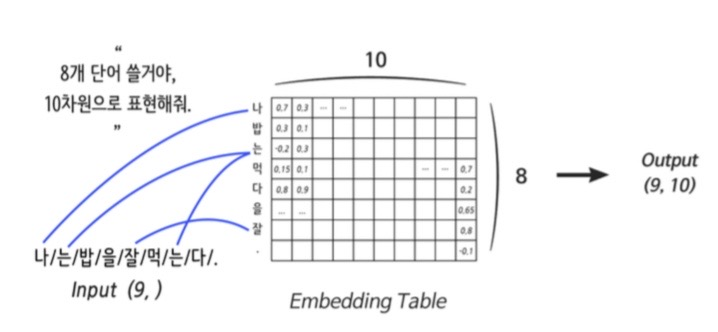

**Embedding Table = Lookup Table**

- Embedding layer는 입력으로 들어온 단어를 분산 표현으로 연결해 주는 역할을 하는데 그것이 Weight에서 특정 행을 읽어오는 것과 같은 이 레이어를 Lookup table

- Look table 매핑 원리

   - 원-핫 인코딩(one-hot encoding)

   https://brunch.co.kr/@kakao-it/189

      - 단어에 순번(인덱스)을 매겨서 표현하는 방식

In [ ]:
#Linear레이어를 원 핫 인코딩을 적용.
#단 하나의 인덱스만 1이고 나머지는 모두 0인 극단적인 벡터 
import tensorflow as tf
import pandas as pd
import numpy as np

#사용할 단어 사전 정의
vocab =  {
    'i':0,
    'need':1,
    "some":2,
    'more':3,
    'coffe':4,
    'cake':5,
    'cat':6,
    'dog':7
}

setence = "i i i i need some more coffe coffe coffe"

#위 setence

_input = [vocab[w] for w in setence.split()] #[0,0,0,0,1,2,3,4,4,4]

vocab_size = len(vocab) # 8

one_hot = tf.one_hot(_input, vocab_size)
print(one_hot.numpy()) #원-핫 인코딩 벡터 출력

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]]


**이제 원-핫 벡터를 Linear layer에에 넣으면 어떻게 될까요?**

In [ ]:
distribution_size = 2 # 보기 좋게 2차원으로 분산 표현
linear = tf.keras.layers.Dense(units=distribution_size,use_bias=False)
one_hot_linear = linear(one_hot)

print("Linear Weight")
print(linear.weights[0].numpy())

print("\nOne-Hot Linear Result")
print(one_hot_linear.numpy())

Linear Weight
[[-0.13245213  0.3731959 ]
 [-0.13284183 -0.63145906]
 [ 0.6779717  -0.63082206]
 [-0.01058149 -0.7208317 ]
 [ 0.62906027 -0.646372  ]
 [ 0.26384938  0.11843622]
 [-0.7239888   0.44191706]
 [-0.2636267   0.3662938 ]]

One-Hot Linear Result
[[-0.13245213  0.3731959 ]
 [-0.13245213  0.3731959 ]
 [-0.13245213  0.3731959 ]
 [-0.13245213  0.3731959 ]
 [-0.13284183 -0.63145906]
 [ 0.6779717  -0.63082206]
 [-0.01058149 -0.7208317 ]
 [ 0.62906027 -0.646372  ]
 [ 0.62906027 -0.646372  ]
 [ 0.62906027 -0.646372  ]]


**적용하니 Linear레이어의 Weight에서 단어 인덱스 배열 [0,0,0,0,1,2,3,4,4]에 해당하는 행만 읽어온다**

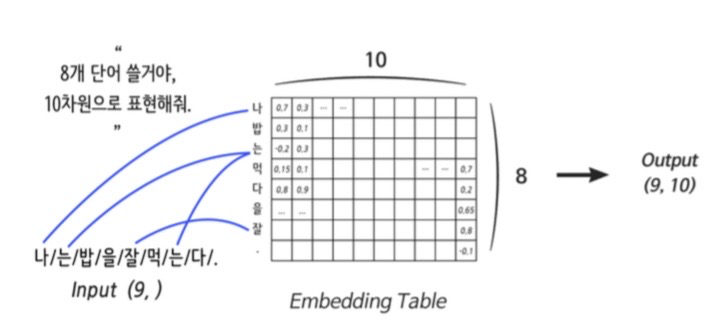

**정리**

- 파란 선
   - 각 단어를 원-핫 인코딩해서 Linear 연산

- 원 - 핫 인코딩을 위한 단어 사전 구축 후 단어를 사전의 인덱스로 변환만 해주면 완벽하게 Embedding layer 사용  

In [ ]:
#Tensorflow 활용하여 임베딩 레이어 선언

some_words = tf.constant([[3,57,35]]) #3번 단어 / 57번 단어 / 35번 단어로 이뤄진 한 문장

print('Embedding을 진행할 문장:', some_words.shape)
embedding_layer = tf.keras.layers.Embedding(input_dim=64, output_dim=100)
#총 64개의 단어를 포함한 Embedding layer를 선언
#각 단어는 100차원으로 분산 표현

print("Embedding된 문장:",embedding_layer(some_words).shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

Embedding을 진행할 문장: (1, 3)
Embedding된 문장: (1, 3, 100)
Embedding Layer의 Weight 형태: (64, 100)


**주의사항**

- 딥러닝은 기본적으로 미분을 기반으로 동작하지만 Embedding layer는 그저 단어의 대응을 시켜줄 뿐 미분이 불가능합니다.

- 그러므로, 어떤 연산 결과를  Embedding layer에 연결시키는 것은 불가능합니다.

- 즉, 입력에 직접 연결되게 사용해야하고 그 입력값이 원-핫 인코딩된 단어 벡터의 형태가 이상적

---

## 문장에 특화된 레이어

### Recurrent layer인 RNN

**Intro**

- 나는 밥을 []는다.라는 예문을 보실 때 []에는 무엇이 들어갈까요?

- 그 이유는 '밥'이라는 단어 때문일 것입니다.

   - 영상과 이미지처럼 뜬금없는 나열이 아닌 맥락성, 시간성, 순차성을 갖고 있습니다. 

   - 이러한 순차 데이터를 처리하기 위한 고안된 것이 RNN입니다.

<br>

**RNN 내용**

- 입력으로 들어가는 모든 단어만큼 Weight를 만드는 게 아니다.

- (입력차원, 출력차원)에 해당하는 단 하나의 Weight를 순차적으로 업데이트를 한다.(지금 이해를 못하셔도 아래의 코드를 진행하면서 다시 설명할 것입니다.)

- 한 문장을 읽고 처리하는데 여러 번의 연산이 필요하여 다른 레이어보다 느립니다.








https://towardsdatascience.com/illustrated-guide-to-recurrent-neural-networks-79e5eb8049c9

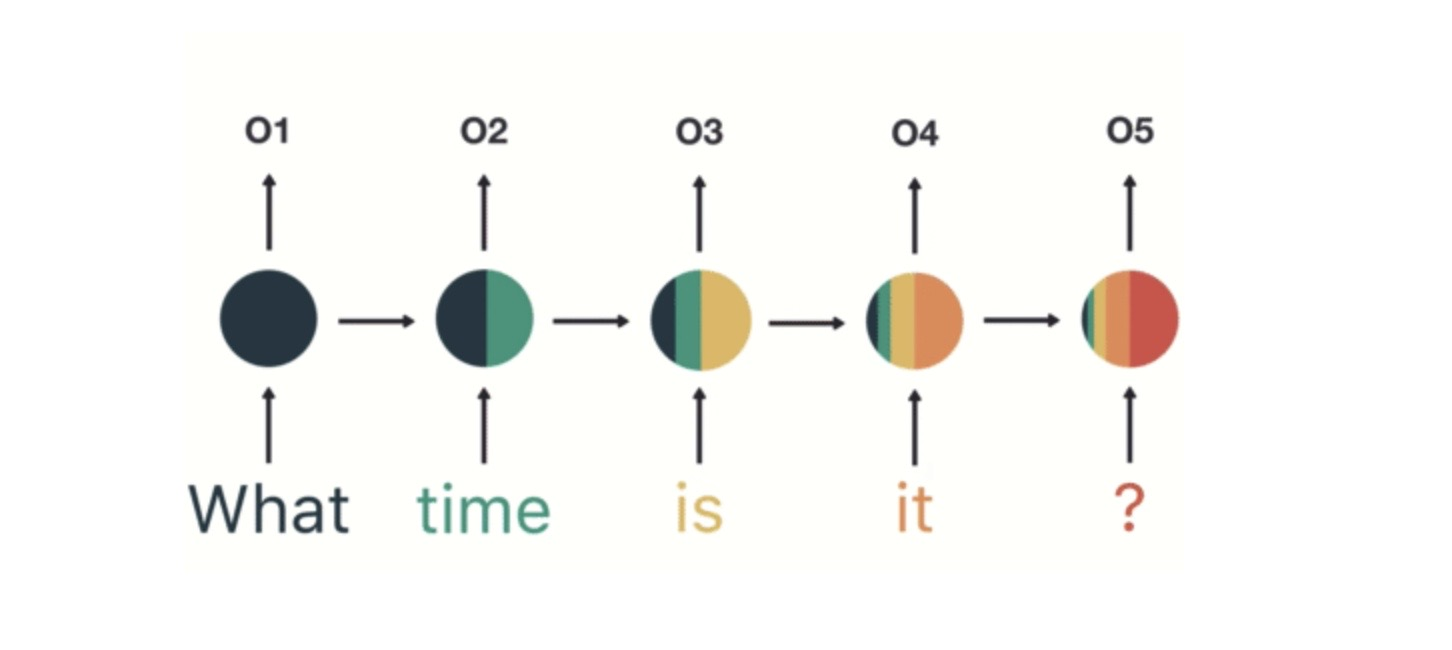

그림을 보시면, 뒤로 갈수록 색깔이 달라지는 것을 볼 수 있습니다.

이는, 입력의 앞부분이 뒤로 갈수록 옅어지게 되어서 손실이 발생합니다.

우리는 이를 기울기 소실 (Vanishing Gradient)라고 부릅니다.



In [ ]:
#코드로 보는 위의 내용

sentence = "What time is it ?"

dic = {
    "is":0,
    "it":1,
    "What":2,
    "time":3,
    "?":4
}

print("RNN에 입력할 문장:", sentence)

sentence_tensor = tf.constant([[dic[word] for word in sentence.split()]])

print(sentence_tensor)
print("Embedding을 위한 단어 매핑:", sentence_tensor.numpy())
print("입력 문장 데이터 형태:", sentence_tensor.shape)

RNN에 입력할 문장: What time is it ?
tf.Tensor([[2 3 0 1 4]], shape=(1, 5), dtype=int32)
Embedding을 위한 단어 매핑: [[2 3 0 1 4]]
입력 문장 데이터 형태: (1, 5)


In [ ]:
embedding_layer = tf.keras.layers.Embedding(input_dim=len(dic), output_dim=100)
emb_out = embedding_layer(sentence_tensor)

print("\nEmbedding 결과:", emb_out.shape)
print("Embedding Layer의 Weight 형태:", embedding_layer.weights[0].shape)

rnn_seq_layer = \
tf.keras.layers.SimpleRNN(units=64, return_sequences=True, use_bias=False)
rnn_seq_out = rnn_seq_layer(emb_out)

print("\nRNN결과 (모든 Step Output):", rnn_seq_out.shape)
print("RNN Layer의 Weight 형태:", rnn_seq_layer.weights[0].shape)

rnn_fin_layer = tf.keras.layers.SimpleRNN(units=64, use_bias=False)
rnn_fin_out = rnn_fin_layer(emb_out)

print("\nRNN결과 (최종 Step Output):", rnn_fin_out.shape)
print("RNN Layer의 Weight 형태:", rnn_fin_layer.weights[0].shape)


Embedding 결과: (1, 5, 100)
Embedding Layer의 Weight 형태: (5, 100)

RNN결과 (모든 Step Output): (1, 5, 64)
RNN Layer의 Weight 형태: (100, 64)

RNN결과 (최종 Step Output): (1, 64)
RNN Layer의 Weight 형태: (100, 64)


- 긍/부정 문장

   - 문장을 모두 읽은 후 최종 Step의 Output만 확인해도 판단 가능

- 문장 생성

   - 이전 단어를 입력으로 받아 생성된 모든 다음 단어

   - 모든 Step에 대한 Output 필요

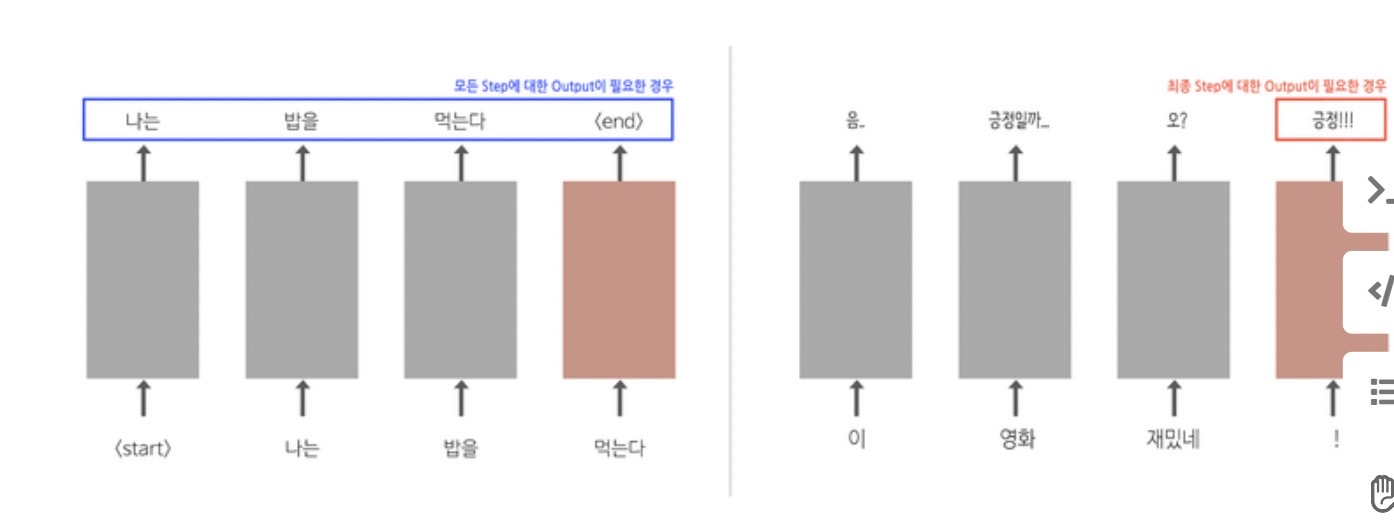

**tf.keras.layers.SimpleRNN 레이어의 return_sequences 인자를 조절함으로 조절**